# Astrophysical source population modeling with Gammapy

## Introduction

The [gammapy.astro.population](http://docs.gammapy.org/en/latest/astro/population/index.html) package contains some simple Galactic source population models.

Here we provide some Python code to compute observable parameter distributions for Galactic gamma-ray source populations.

* Observables: Flux, GLON, GLAT
* Source classes: Pulsar (PSR), Supernova remnant (SNR), pulsar wind nebula (PWN)

References:

* Section 6.2 in the Fermi-LAT collaboration paper ["The First Fermi-LAT Catalog of Sources Above 10 GeV"](http://adsabs.harvard.edu/abs/2013arXiv1306.6772T)
* Axel Donath's bachelor thesis ["Modelling Galactic gamma-ray source populations"](http://pubman.mpdl.mpg.de/pubman/item/escidoc:912132:1/component/escidoc:912131/BScThesis_ddonath.pdf), specifically Chapter 4.
* Casanova & Dingus (2008), ["Constraints on the TeV source population and its contribution to the galactic diffuse TeV emission"](http://adsabs.harvard.edu/abs/2008APh....29...63C)
* Strong (2007), ["Source population synthesis and the Galactic diffuse gamma-ray emission"](http://adsabs.harvard.edu/abs/2007Ap%26SS.309...35S)

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import astropy.units as u
from gammapy.utils.random import sample_powerlaw
from gammapy.astro import population

## Simulate positions

In [3]:
# Spatial distribution using Lorimer (2006) model
n_sources = int(1e5)

table = population.make_base_catalog_galactic(
    n_sources=n_sources,
    rad_dis='L06',
    vel_dis='F06B',
    max_age=1e6 * u.yr,
    spiralarms=True,
)

## Simulate luminosities

Several source population models, e.g. the 1FHL paper or Strong (2007), use power-law luminosity functions.

Here we implement the "reference model" from the 1FHL catalog paper section 6.2.

In [4]:
# Source luminosity (ph s^-1)

luminosity = sample_powerlaw(
    x_min=1e34,
    x_max=1e37,
    gamma=1.5,
    size=n_sources,
)
table['luminosity'] = luminosity

## Compute observable parameters

In [5]:
table = population.add_observed_parameters(table)
table.info()

<Table length=100000>
   name     dtype     unit                description              
---------- ------- --------- --------------------------------------
       age float64        yr                      Age of the source
     n_ISM float64   1 / cm3            Interstellar medium density
 spiralarm   str18                                 Which spiralarm?
   x_birth float64       kpc   Galactocentric x coordinate at birth
   y_birth float64       kpc   Galactocentric y coordinate at birth
   z_birth float64       kpc   Galactocentric z coordinate at birth
         x float64       kpc            Galactocentric x coordinate
         y float64       kpc            Galactocentric y coordinate
         z float64       kpc            Galactocentric z coordinate
        vx float64    km / s Galactocentric velocity in x direction
        vy float64    km / s Galactocentric velocity in y direction
        vz float64    km / s Galactocentric velocity in z direction
     v_abs float64    km /

## Check output

The simulation is done, you could save the simulated catalog to a file.

Here we just plot a few distributions to check if the results look OK.

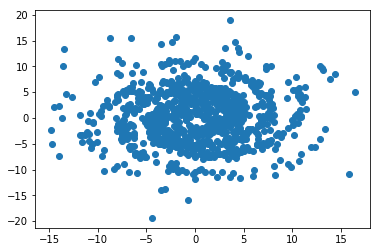

In [6]:
plt.scatter(table['x'][:1000], table['y'][:1000]);

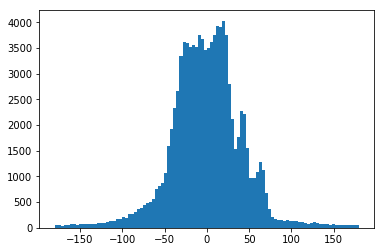

In [7]:
plt.hist(table['GLON'], bins=100);

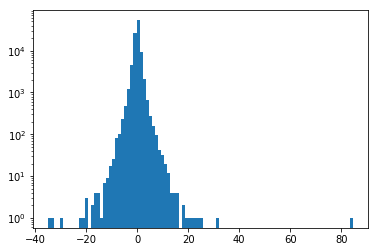

In [8]:
plt.hist(table['GLAT'], bins=100, log=True);

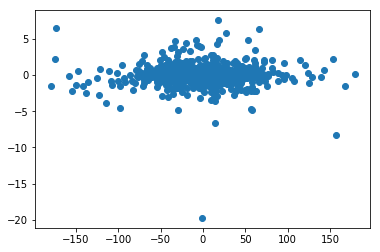

In [9]:
plt.scatter(table['GLON'][:1000], table['GLAT'][:1000]);

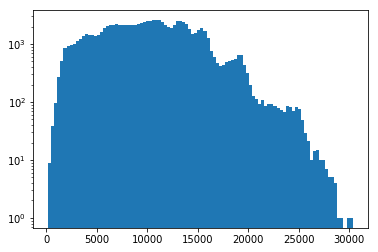

In [10]:
plt.hist(table['distance'], bins=100, log=True);

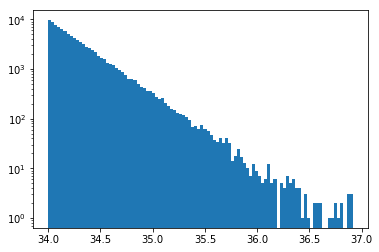

In [11]:
plt.hist(np.log10(table['luminosity']), bins=100, log=True);

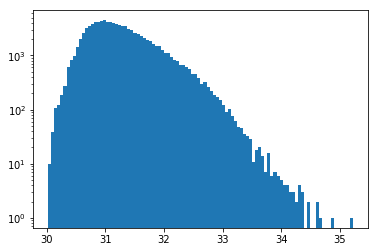

In [12]:
plt.hist(np.log10(table['flux']), bins=100, log=True);

In [13]:
# TODO: plot GLON, GLAT, FLUX distribution


## Exercises

TODO

In [14]:
# Start exercises here

## What next?

TODO: summarise what was done here briefly.

TODO: add some pointers to other documentation.